## Retrieve data using Spark

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=f24f44db14556383127ddc5d8fe011fba09bf1fdeb602c2e31ac717f02862b64
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [2]:
!pip install findspark

In [3]:
#Linking Google drive to Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Dependencies
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [5]:
#Importing packages to retrive data from  spark
from pyspark import SparkFiles
from pyspark.sql import SparkSession
from pathlib import Path
import time
import findspark
findspark.init()

In [6]:
!ls "/content/drive/My Drive/"

'2022 New Hire Packet.gdoc'	 excel-challenge
'2022 New Hire Packet.pdf'	'LOR AMANDA RESUME.pptx'
 20240824_014026.jpg		'Project 4'
'AMANDA LOR RESUME.pdf'		 STEP_1___CVSA_Questionnaire_07_19_24.pdf
'Colab Notebooks'		 UCF
 CV.gdoc			 Untitled0.ipynb
'Document sans titre (1).gdoc'	 Untitled1.ipynb
'Document sans titre.gdoc'


Reading all of the CSVs

In [7]:
data0 = pd.read_csv('/content/drive/My Drive/Project 4/Resources/movies_dataset_0.csv')
data0.head()

,imdb_id,title,runtime,overview,rated,imdb_votes,popularity,imdb_rating,rotten_tomatoes_rating,metacritic_rating,...,star_1,star_2,star_3,genre_1,genre_2,genre_3,director_1,director_2,release_year,outcome
0,tt0094721,Beetlejuice,92 min,A newly dead New England couple seeks help fro...,PG,"348,874",941.557,7.5,86.0,70.0,...,Alec Baldwin,Geena Davis,Michael Keaton,Comedy,Fantasy,NaN,Tim Burton,NaN,1988,True
1,tt27682129,Prey,100 min,A young couple is compelled to leave their Chr...,R,"233,550",436.919,7.1,94.0,71.0,...,Amber Midthunder,Dakota Beavers,Dane DiLiegro,Action,Adventure,Horror,Dan Trachtenberg,NaN,2024,False
2,tt0295701,xXx,124 min,Xander Cage is your standard adrenaline junkie...,PG-13,"187,525",369.083,5.8,48.0,48.0,...,Vin Diesel,Asia Argento,Marton Csokas,Action,Adventure,Thriller,Rob Cohen,NaN,2002,False
3,tt4154756,Avengers: Infinity War,149 min,As the Avengers and their allies have continue...,PG-13,"1,226,533",270.163,8.4,85.0,68.0,...,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,Action,Adventure,Sci-Fi,Anthony Russo,Joe Russo,2018,True
4,tt23778968,Thelma,116 min,When 93-year-old Thelma Post gets duped by a p...,Not Rated,"37,145",263.208,7.0,92.0,74.0,...,Eili Harboe,Kaya Wilkins,Henrik Rafaelsen,Drama,Fantasy,Horror,Joachim Trier,NaN,2024,True


In [8]:
data1 = pd.read_csv('/content/drive/My Drive/Project 4/Resources/movies_dataset_1.csv')
data1.head()

,imdb_id,title,runtime,overview,rated,imdb_votes,popularity,imdb_rating,rotten_tomatoes_rating,metacritic_rating,...,star_1,star_2,star_3,genre_1,genre_2,genre_3,director_1,director_2,release_year,outcome
0,tt10838180,The Matrix Resurrections,148 min,"Plagued by strange memories, Neo's life takes ...",R,"284,577",54.068,5.7,63.0,63.0,...,Keanu Reeves,Carrie-Anne Moss,Yahya Abdul-Mateen II,Action,Sci-Fi,NaN,Lana Wachowski,NaN,2021,False
1,tt1192628,Rango,107 min,"When Rango, a lost family pet, accidentally wi...",PG,"296,553",52.110,7.3,88.0,75.0,...,Johnny Depp,Isla Fisher,Timothy Olyphant,Animation,Action,Adventure,Gore Verbinski,NaN,2011,True
2,tt15679400,Knock at the Cabin,100 min,"While vacationing at a remote cabin, a young g...",R,"121,112",53.974,6.1,67.0,63.0,...,Dave Bautista,Jonathan Groff,Ben Aldridge,Horror,Mystery,Thriller,M. Night Shyamalan,NaN,2023,True
3,tt1302011,Kung Fu Panda 2,90 min,Po and his friends fight to stop a peacock vil...,PG,"326,509",50.094,7.3,81.0,67.0,...,Jack Black,Angelina Jolie,Jackie Chan,Animation,Action,Adventure,Jennifer Yuh Nelson,NaN,2011,True
4,tt27155038,"Ruby Gillman, Teenage Kraken",91 min,"Ruby Gillman, a sweet and awkward high school ...",PG,"11,541",53.797,5.7,65.0,50.0,...,Jane Fonda,Lana Condor,Toni Collette,Animation,Action,Comedy,Kirk DeMicco,Faryn Pearl,2023,False


In [9]:
data2 = pd.read_csv('/content/drive/My Drive/Project 4/Resources/movies_dataset_2.csv')
data2.head()

,imdb_id,title,runtime,overview,rated,imdb_votes,popularity,imdb_rating,rotten_tomatoes_rating,metacritic_rating,...,star_1,star_2,star_3,genre_1,genre_2,genre_3,director_1,director_2,release_year,outcome
0,tt2011159,No Good Deed,84 min,"Terri is a devoted wife and mother of two, liv...",PG-13,"22,194",37.883,5.6,12.0,26.0,...,Taraji P. Henson,Idris Elba,Leslie Bibb,Crime,Drama,Horror,Sam Miller,NaN,2014,False
1,tt3110958,Now You See Me 2,129 min,One year after outwitting the FBI and winning ...,PG-13,"325,510",33.684,6.4,33.0,46.0,...,Jesse Eisenberg,Mark Ruffalo,Woody Harrelson,Action,Adventure,Comedy,Jon M. Chu,NaN,2016,False
2,tt0493464,Wanted,110 min,Doormat Wesley Gibson is an office worker whos...,R,"411,856",37.809,6.7,71.0,64.0,...,Angelina Jolie,James McAvoy,Morgan Freeman,Action,Crime,Thriller,Timur Bekmambetov,NaN,2008,True
3,tt2024544,12 Years a Slave,134 min,"In the pre-Civil War United States, Solomon No...",R,"747,876",37.780,8.1,95.0,96.0,...,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Biography,Drama,History,Steve McQueen,NaN,2013,True
4,tt1615918,Alvin and the Chipmunks: Chipwrecked,87 min,"Playing around while aboard a cruise ship, the...",G,"40,342",37.673,4.4,10.0,24.0,...,Justin Long,Matthew Gray Gubler,Jesse McCartney,Adventure,Comedy,Family,Mike Mitchell,NaN,2011,False


In [10]:
data3 = pd.read_csv('/content/drive/My Drive/Project 4/Resources/movies_dataset_3.csv')
data3.head()

,imdb_id,title,runtime,overview,rated,imdb_votes,popularity,imdb_rating,rotten_tomatoes_rating,metacritic_rating,...,star_1,star_2,star_3,genre_1,genre_2,genre_3,director_1,director_2,release_year,outcome
0,tt0209144,Memento,113 min,Leonard Shelby is tracking down the man who ra...,R,"1,337,799",29.914,8.4,94.0,83.0,...,Guy Pearce,Carrie-Anne Moss,Joe Pantoliano,Mystery,Thriller,NaN,Christopher Nolan,NaN,2000,True
1,tt10016180,The Little Things,128 min,"Deputy Sheriff Joe ""Deke"" Deacon joins forces ...",R,"129,573",24.000,6.3,45.0,54.0,...,Denzel Washington,Rami Malek,Jared Leto,Crime,Drama,Mystery,John Lee Hancock,NaN,2021,False
2,tt0286106,Signs,106 min,A family living on a farm finds mysterious cro...,PG-13,"391,430",24.487,6.8,75.0,59.0,...,Mel Gibson,Joaquin Phoenix,Rory Culkin,Drama,Mystery,Sci-Fi,M. Night Shyamalan,NaN,2002,False
3,tt0497972,Sex and Death 101,117 min,"A guy's life is turned around by an email, whi...",R,"11,624",29.904,5.9,25.0,24.0,...,Robert Wisdom,Tanc Sade,Patton Oswalt,Comedy,Drama,Fantasy,Daniel Waters,NaN,2007,False
4,tt0970411,City of Ember,90 min,"For generations, the people of the City of Emb...",PG,"70,313",29.899,6.4,53.0,58.0,...,Saoirse Ronan,Toby Jones,Bill Murray,Adventure,Drama,Family,Gil Kenan,NaN,2008,False


Initializing the Spark Session, reading the CSVs in my Google drive and unioning all of the CSVs.

In [11]:
# Initialize Spark session
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()
#Define Path
data0 = Path('/content/drive/My Drive/Project 4/Resources/movies_dataset_0.csv').resolve()
data1 = Path('/content/drive/My Drive/Project 4/Resources/movies_dataset_1.csv').resolve()
data2 = Path('/content/drive/My Drive/Project 4/Resources/movies_dataset_2.csv').resolve()
data3 = Path('/content/drive/My Drive/Project 4/Resources/movies_dataset_3.csv').resolve()

# Read the CSV file using the absolute path
df0 = spark.read.csv(
    str(data0),
    sep=",",
    header=True,
    inferSchema=True,
    quote='"',    # Handles quoted strings
    escape='"',   # Escape character for embedded quotes
    multiLine=True  # Handles multiline fields in case of long text
)

df1 = spark.read.csv(
    str(data1),
    sep=",",
    header=True,
    inferSchema=True,
    quote='"',
    escape='"',
    multiLine=True
)
df2 = spark.read.csv(
    str(data2),
    sep=",",
    header=True,
    inferSchema=True,
    quote='"',
    escape='"',
    multiLine=True
)
df3 = spark.read.csv(
    str(data3),
    sep=",",
    header=True,
    inferSchema=True,
    quote='"',
    escape='"',
    multiLine=True
)
# #Merge the Dataframes using union
merged_df = df0.union(df1).union(df2).union(df3)
merged_df.show()

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


+----------+--------------------+-------+--------------------+---------+----------+----------+-----------+----------------------+-----------------+---------+----------+-----------------+-------------------+--------------------+--------------------+---------+----------+----------+------------------+--------------------+------------+-------+
|   imdb_id|               title|runtime|            overview|    rated|imdb_votes|popularity|imdb_rating|rotten_tomatoes_rating|metacritic_rating|   budget|   revenue|financial_success|             star_1|              star_2|              star_3|  genre_1|   genre_2|   genre_3|        director_1|          director_2|release_year|outcome|
+----------+--------------------+-------+--------------------+---------+----------+----------+-----------+----------------------+-----------------+---------+----------+-----------------+-------------------+--------------------+--------------------+---------+----------+----------+------------------+-----------------

## Clean, normalize, and standardize data before modeling

In [42]:
# Converting merged df from Spark into a Pandas DataFrame
movies_df = merged_df.toPandas()
movies_df.head(3)

,imdb_id,title,runtime,overview,rated,imdb_votes,popularity,imdb_rating,rotten_tomatoes_rating,metacritic_rating,...,star_1,star_2,star_3,genre_1,genre_2,genre_3,director_1,director_2,release_year,outcome
0,tt0094721,Beetlejuice,92 min,A newly dead New England couple seeks help fro...,PG,"348,874",941.557,7.5,86.0,70.0,...,Alec Baldwin,Geena Davis,Michael Keaton,Comedy,Fantasy,None,Tim Burton,None,1988,True
1,tt27682129,Prey,100 min,A young couple is compelled to leave their Chr...,R,"233,550",436.919,7.1,94.0,71.0,...,Amber Midthunder,Dakota Beavers,Dane DiLiegro,Action,Adventure,Horror,Dan Trachtenberg,None,2024,False
2,tt0295701,xXx,124 min,Xander Cage is your standard adrenaline junkie...,PG-13,"187,525",369.083,5.8,48.0,48.0,...,Vin Diesel,Asia Argento,Marton Csokas,Action,Adventure,Thriller,Rob Cohen,None,2002,False


In [43]:
#Checking columns
movies_df.columns

Index(['imdb_id', 'title', 'runtime', 'overview', 'rated', 'imdb_votes',
       'popularity', 'imdb_rating', 'rotten_tomatoes_rating',
       'metacritic_rating', 'budget', 'revenue', 'financial_success', 'star_1',
       'star_2', 'star_3', 'genre_1', 'genre_2', 'genre_3', 'director_1',
       'director_2', 'release_year', 'outcome'],
      dtype='object')

In [44]:
#Dropping unncesary columns for the model
movies_df.drop([
    'imdb_id','title', 'overview', 'financial_success', 'imdb_rating', 'rotten_tomatoes_rating','metacritic_rating'
     ], axis=1, inplace=True)

In [45]:
#Checking data types
movies_df.dtypes

,0
runtime,object
rated,object
imdb_votes,object
popularity,float64
budget,int32
revenue,int64
star_1,object
star_2,object
star_3,object
genre_1,object


In [46]:
#Organizing columns names and coverting the 'outcome' column into a boolean
movies_df = movies_df[['imdb_votes','popularity','revenue','release_year','runtime', 'rated','budget', 'star_1', 'star_2', 'star_3', 'genre_1','genre_2','genre_3', 'director_1','director_2','outcome']]
movies_df['outcome'] = movies_df['outcome'].astype(int)
movies_df.head(3)

,imdb_votes,popularity,revenue,release_year,runtime,rated,budget,star_1,star_2,star_3,genre_1,genre_2,genre_3,director_1,director_2,outcome
0,"348,874",941.557,74849333,1988,92 min,PG,15000000,Alec Baldwin,Geena Davis,Michael Keaton,Comedy,Fantasy,None,Tim Burton,None,1
1,"233,550",436.919,0,2024,100 min,R,0,Amber Midthunder,Dakota Beavers,Dane DiLiegro,Action,Adventure,Horror,Dan Trachtenberg,None,0
2,"187,525",369.083,277448382,2002,124 min,PG-13,70000000,Vin Diesel,Asia Argento,Marton Csokas,Action,Adventure,Thriller,Rob Cohen,None,0


In [47]:
#Extracting the string(min) from the 'runtime' column
def runtime_cleaner (string):
    minutes = string.split(" ")[0]
    return int(minutes)

movies_df['runtime'] = movies_df['runtime'].map(runtime_cleaner)
movies_df.head(3)

,imdb_votes,popularity,revenue,release_year,runtime,rated,budget,star_1,star_2,star_3,genre_1,genre_2,genre_3,director_1,director_2,outcome
0,"348,874",941.557,74849333,1988,92,PG,15000000,Alec Baldwin,Geena Davis,Michael Keaton,Comedy,Fantasy,None,Tim Burton,None,1
1,"233,550",436.919,0,2024,100,R,0,Amber Midthunder,Dakota Beavers,Dane DiLiegro,Action,Adventure,Horror,Dan Trachtenberg,None,0
2,"187,525",369.083,277448382,2002,124,PG-13,70000000,Vin Diesel,Asia Argento,Marton Csokas,Action,Adventure,Thriller,Rob Cohen,None,0


In [48]:
# Identify categorical columns
movies_categorical = movies_df.select_dtypes(include=["object"]).columns.tolist()

In [49]:
#Checking my categorical columns
movies_categorical

['imdb_votes',
 'rated',
 'star_1',
 'star_2',
 'star_3',
 'genre_1',
 'genre_2',
 'genre_3',
 'director_1',
 'director_2']

In [50]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(movies_df[movies_categorical]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names_out(movies_categorical)

# Display the first few rows of the encoded DataFrame
encode_df.head()

,"imdb_votes_1,011,242","imdb_votes_1,014,502","imdb_votes_1,047,039","imdb_votes_1,063,893","imdb_votes_1,075,607","imdb_votes_1,076","imdb_votes_1,080,967","imdb_votes_1,083,433","imdb_votes_1,083,877","imdb_votes_1,084,764",...,director_2_ Tyler Gillett,director_2_ Vicky Jenson,"director_2_ Vicky Jenson, Rob Letterman",director_2_ Walt Dohrn,"director_2_ Warren Coleman, Judy Morris","director_2_ Wilfred Jackson, Hamilton Luske",director_2_ Will Merrick,director_2_ Will Speck,"director_2_ Wolfgang Reitherman, Art Stevens",director_2_None
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
# Merge one-hot encoded features and drop the originals
movies_df = movies_df.merge(encode_df,left_index=True, right_index=True)
movies_df = movies_df.drop(movies_categorical, axis=1)
movies_df.head()

,popularity,revenue,release_year,runtime,budget,outcome,"imdb_votes_1,011,242","imdb_votes_1,014,502","imdb_votes_1,047,039","imdb_votes_1,063,893",...,director_2_ Tyler Gillett,director_2_ Vicky Jenson,"director_2_ Vicky Jenson, Rob Letterman",director_2_ Walt Dohrn,"director_2_ Warren Coleman, Judy Morris","director_2_ Wilfred Jackson, Hamilton Luske",director_2_ Will Merrick,director_2_ Will Speck,"director_2_ Wolfgang Reitherman, Art Stevens",director_2_None
0,941.557,74849333,1988,92,15000000,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,436.919,0,2024,100,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,369.083,277448382,2002,124,70000000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,270.163,2052415039,2018,149,300000000,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,263.208,9818454,2024,116,5000000,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
#Checking columns
column_list = movies_df.columns.tolist()
column_list[0:5]

['popularity', 'revenue', 'release_year', 'runtime', 'budget']

 ## Separate the Features (X) from the Target (y)

In [53]:
# Split our preprocessed data into our features and target arrays
y = movies_df["outcome"].values
X = movies_df.drop(["outcome"], axis=1).values

## Training and Scaling Data

In [54]:
#Split the processed data from the movies_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [55]:
#Double checking the splitted data
print(X_train.shape)
print(X_test.shape)
print(X.shape)

(1532, 6816)
(511, 6816)
(2043, 6816)


In [56]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Create the model using tensor flow

In [144]:
# Define the model - deep neural net

number_input_features = len(X_train[0])
hidden_nodes_layer_1 = 500
hidden_nodes_layer_2 = 1000
hidden_nodes_layer_3 = 1500

tf.random.set_seed(1)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer_1, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer_2, activation="relu"))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer_3, activation="tanh"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_74 (Dense)                     │ (None, 500)                 │       3,408,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 1000)                │         501,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 1500)                │       1,501,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 1)                   │           1,501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,412,501 (20.65 MB)

 Trainable params: 5,412,501 (20.65 MB)

 Non-trainable params: 0 (0.00 B)

In [145]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
#Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.5744 - loss: 1.3072
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.9640 - loss: 0.1736
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9905 - loss: 0.0364
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.9930 - loss: 0.0132
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9930 - loss: 0.0109
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9937 - loss: 0.0191
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9938 - loss: 0.0095
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9930 - loss: 0.0112
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.9933 - loss: 0.0086
Epoch 10/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.9937 - loss: 0.0103
Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9938 - loss: 0.0093
Epoch 12/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy:

In [142]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

16/16 - 0s - 11ms/step - accuracy: 0.6517 - loss: 0.8402
Loss: 0.840156078338623, Accuracy: 0.6516634225845337


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


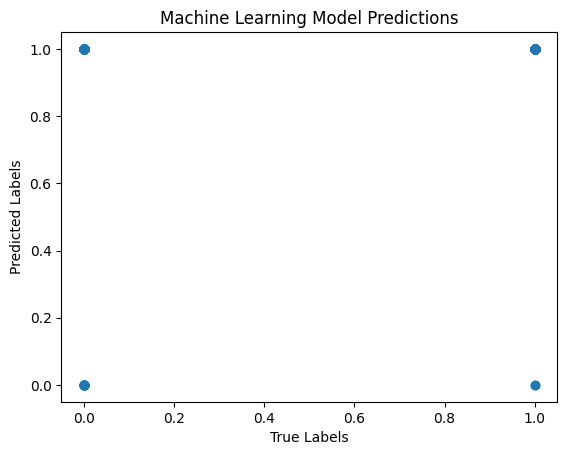

In [31]:
# Make predictions
y_pred = nn_model.predict(X_test)

# Create a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Machine Learning Model Predictions')
plt.show()

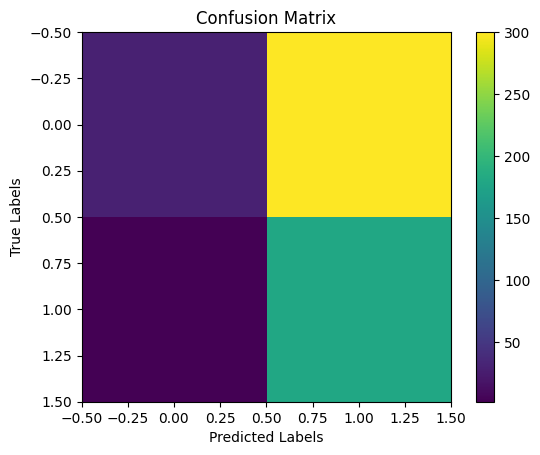

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

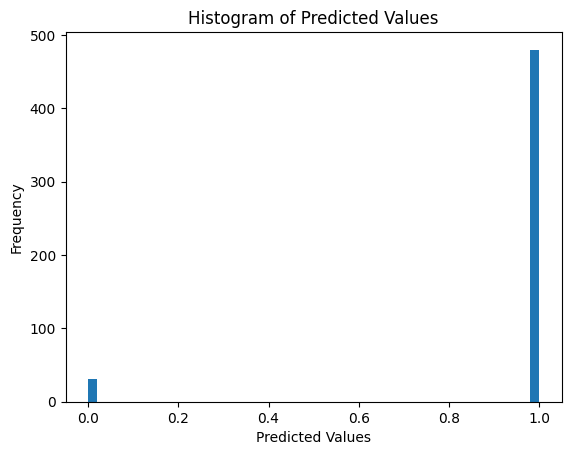

In [33]:
plt.hist(y_pred, bins=50)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Values')
plt.show()

#### --------


COMMENTS:

We initially selected a neural network architecture with 10 and 20 nodes, two hidden layers, one output layer, and trained it for 100 epochs. This model yielded an accuracy of 68%. To optimize performance, we experimented by adjusting the number of epochs, both increasing and decreasing them. However, these changes led to a decline in accuracy. Ultimately, we settled on 70 epochs, as it offered the same performance as 100 epochs but required less computational power.

Next, we explored modifications to the number of hidden layers and activation functions. The default activation function was ReLU, which is commonly used due to its simplicity and effectiveness in hidden layers. I decided to add an additional hidden layer and switch the activation function to tanh, which, unlike ReLU, outputs values between -1 and 1 and is similar to the sigmoid function. However, these changes did not improve the model's accuracy.

Finally, we adjusted the number of nodes, increasing them to 32 and 64 while maintaining the use of multiples of 2. This change resulted in a significant improvement, boosting the model's accuracy to 72%.